TIBBİ GÖRÜNTÜ İŞLEME AÇISINDAN NELER YAPABİLİRİZ;

1)BACAK (FEMUR,PATELLA,FIBULA,TIBIA) KEMİKLERİNİN SEGMENTASYONU

2)KEMİKLERİN MERKEZİ ÇİZGİSİNİN BULUNMASI




TIBBİ GEREKSİNİMİ;

-KEMİĞİN MERKEZİ ÇİZGİSİNİN BULUNMASI, TIBBİ OPERASYONLARDA; PLATİN İMPLEMANTASYONUNDA VİDALARIN ATILACAĞI YER VE AÇISI İÇİN ÖNEMLİDİR.



BEKLENEN YAKLAŞIK SEGMENTASYON GÖRSELLERİ AŞAĞIDAKİ GİBİDİR;

TEST GÖRÜNTÜSÜ-LABELİ-MEDEL ÇIKTISI

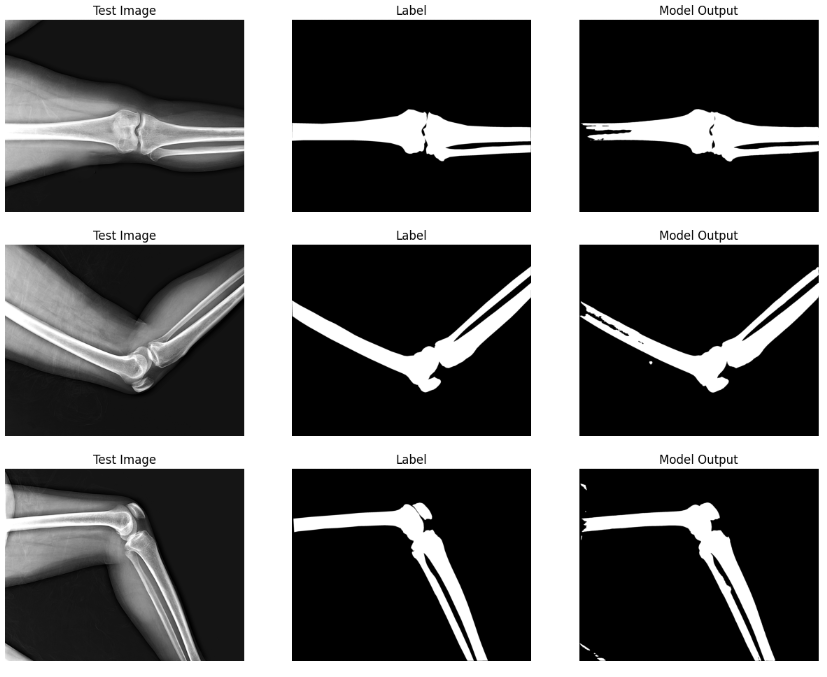

KÜTÜPHANELERİN IMPORT EDİLMESİ:

In [1]:
import logging
import os
import sys
import tempfile
from glob import glob
import numpy as np
import torch
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter


import monai
from monai.transforms import Compose, LoadImage, ScaleIntensity, RandSpatialCrop, RandRotate90, Activations, AsDiscrete
from monai.data import ArrayDataset, create_test_image_2d, decollate_batch, DataLoader
from monai.inferers import sliding_window_inference
from monai.metrics import DiceMetric
from monai.transforms import (
    Activations,
    AsDiscrete,
    Compose,
    LoadImage,
    RandRotate90,
    RandSpatialCrop,
    ScaleIntensity)
from monai.visualize import plot_2d_or_3d_image
import matplotlib.pyplot as plt

3 ADET İMAGE VE LABEL GÖRÜNTÜSÜ;

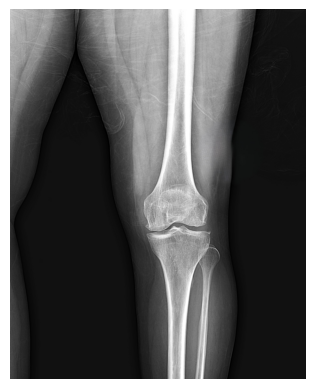

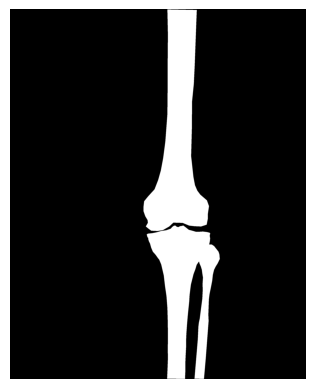

In [2]:
#İMAGE 1 - LABEL 1

# PNG dosyasının yolu
image_path = r"C:\Users\wdewe\OneDrive\Belgeler\Dersler\Güncel Dersler\Görüntü İşleme - Biyomedikal Mühendisliği - Bitirme Projesi\Büt\48\DB\images\image (1).png"
label_path = r"C:\Users\wdewe\OneDrive\Belgeler\Dersler\Güncel Dersler\Görüntü İşleme - Biyomedikal Mühendisliği - Bitirme Projesi\Büt\48\DB\label\label (1).png"
# Resmi aç
image = Image.open(image_path)
label = Image.open(label_path)


# Resmi görüntüle
plt.imshow(image, cmap='gray')
plt.axis('off')  # Eksenleri gizle
plt.show()

plt.imshow(label, cmap='gray')
plt.axis('off')  # Eksenleri gizle
plt.show()

İMAGE 2 - LABEL 2

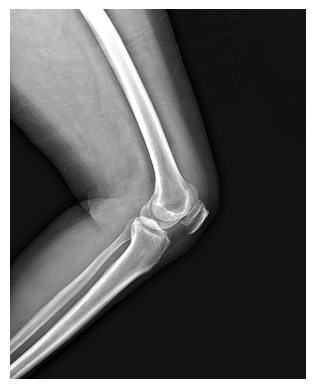

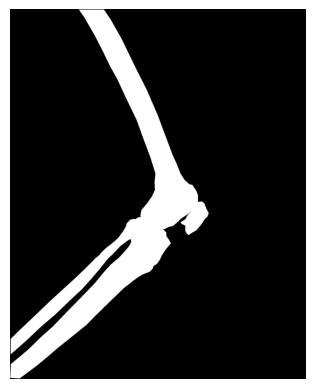

In [3]:
# PNG dosyasının yolu
image_path1 = r"C:\Users\wdewe\OneDrive\Belgeler\Dersler\Güncel Dersler\Görüntü İşleme - Biyomedikal Mühendisliği - Bitirme Projesi\Büt\48\DB\images\image (2).png"
label_path1 = r"C:\Users\wdewe\OneDrive\Belgeler\Dersler\Güncel Dersler\Görüntü İşleme - Biyomedikal Mühendisliği - Bitirme Projesi\Büt\48\DB\label\label (2).png"

image1 = Image.open(image_path1)
label1 = Image.open(label_path1)


# Resmi görüntüle
plt.imshow(image1, cmap='gray')
plt.axis('off')  # Eksenleri gizle
plt.show()

plt.imshow(label1, cmap='gray')
plt.axis('off')  # Eksenleri gizle
plt.show()

İMAGE 3 - LABEL 3

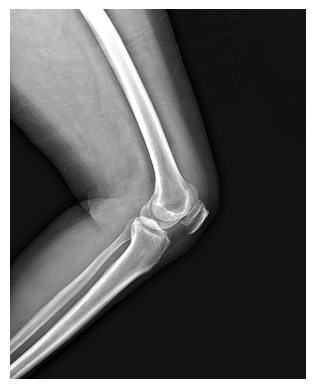

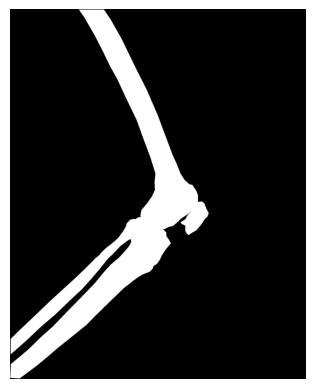

In [4]:
# PNG dosyasının yolu
image_path2 = r"C:\Users\wdewe\OneDrive\Belgeler\Dersler\Güncel Dersler\Görüntü İşleme - Biyomedikal Mühendisliği - Bitirme Projesi\Büt\48\DB\images\image (3).png"
label_path2 = r"C:\Users\wdewe\OneDrive\Belgeler\Dersler\Güncel Dersler\Görüntü İşleme - Biyomedikal Mühendisliği - Bitirme Projesi\Büt\48\DB\label\label (3).png"

image1 = Image.open(image_path1)
label1 = Image.open(label_path1)


# Resmi görüntüle
plt.imshow(image1, cmap='gray')
plt.axis('off')  # Eksenleri gizle
plt.show()

plt.imshow(label1, cmap='gray')
plt.axis('off')  # Eksenleri gizle
plt.show()

İMAGES VE LABELS DOSYALARININ KODA BAĞLANMASI:

In [2]:
# Masaüstü yolunuzu açıkça tanımlayın
desktop_path = r"C:\Users\wdewe\OneDrive\Desktop"

# images klasörünün tam yolunu oluşturun
images_folder = os.path.join(desktop_path, "images")

# .png uzantılı dosyaları bulmak için glob kullanın
images = sorted(glob(os.path.join(images_folder, "*.png")))

In [3]:
# Kullanıcının masaüstü yolunu alın
desktop_path = r"C:\Users\wdewe\OneDrive\Desktop"

# label klasörünün tam yolunu oluşturun
label_folder = os.path.join(desktop_path, "Labels")

# .png uzantılı dosyaları bulmak için glob kullanın
labels = sorted(glob(os.path.join(label_folder, "*.png")))


COMPOSE;

ScaleNorm kullanımı bu kodlarda mevcuttur. Görüntüler 0-1 arası matematiksel bir tabana göre normalize edilmektedir.Ders slaytlarından faydalanılmıştır. Görüntü boyutundan bağımsız çalışmayı sağlamaktadır.

In [4]:
# Eğitim görüntü dönüşümleri
train_imtrans = Compose(
    [
        LoadImage(image_only=True, ensure_channel_first=True),
        ScaleIntensity(),

        RandRotate90(prob=0.5, spatial_axes=(0, 1)),
    ]
)

# Eğitim etiket dönüşümleri
train_labeltrans = Compose(
    [
        LoadImage(image_only=True, ensure_channel_first=True),
        ScaleIntensity(),

        RandRotate90(prob=0.5, spatial_axes=(0, 1)),
    ]
)

# Test görüntü dönüşümleri
test_imtrans = Compose([LoadImage(image_only=True, ensure_channel_first=True), ScaleIntensity()])
test_labeltrans = Compose([LoadImage(image_only=True, ensure_channel_first=True), ScaleIntensity()])

# Post-processing dönüşümleri
post_trans = Compose([Activations(sigmoid=True), AsDiscrete(threshold=0.6)])


Eğitim ve test için görüntülerin alınması

In [5]:
# Eğitim verisi için veri kümesi oluşturma
train_ds = ArrayDataset(images[:50], train_imtrans, labels[:50], train_labeltrans)
train_loader = DataLoader(train_ds, batch_size=1, shuffle=True, num_workers=8, pin_memory=torch.cuda.is_available())

# Test verisi için veri kümesi oluşturma
test_ds = ArrayDataset(images[50:], test_imtrans, labels[50:], test_labeltrans)
test_loader = DataLoader(test_ds, batch_size=1, shuffle=False, num_workers=4, pin_memory=torch.cuda.is_available())

In [6]:
# Eğitim ve test veri kümesinde kullanılan görüntülerin sayısını yazdırma
train_image_count = len(images[:50])
test_image_count = len(images[50:])

print(f"Eğitim verisinde kullanılan görüntü sayısı: {train_image_count}")
print(f"Test verisinde kullanılan görüntü sayısı: {test_image_count}")


Eğitim verisinde kullanılan görüntü sayısı: 50
Test verisinde kullanılan görüntü sayısı: 28


Benzerlik ölçümü için metrik tanımı;

In [7]:
dice_metric = DiceMetric(include_background=True, reduction="mean", get_not_nans=False)

Modeli oluştur: UNet, DiceLoss and Adam optimizer;

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = monai.networks.nets.UNet(
    spatial_dims=2,
    in_channels=1,
    out_channels=1,
    channels=(16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2),
    num_res_units=2,
).to(device)
loss_function = monai.losses.DiceLoss(sigmoid=True)
optimizer = torch.optim.Adam(model.parameters(), 1e-3)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

Eğitime başla;

In [9]:
epoch_len = len(train_loader)  # Batch sayısını doğrudan train_loader'dan al

In [10]:
# Eğitim parametrelerini ayarlama
epoch_loss_values = list()
writer = SummaryWriter()

# Batch size'ı 1 olarak ayarlıyoruz
batch_size = 1

# Eğitim döngüsü
for epoch in range(20):  # Bütün veriyi 30 defa gör
    print("-" * 20)
    print(f"Epoch {epoch + 1}/20")

    model.train()
    epoch_loss = 0
    epoch_correct = 0  # Doğru tahmin sayısını tutacak değişken
    epoch_total = 0    # Toplam örnek sayısını tutacak değişken
    step = 0
    epoch_len = len(train_loader)  # Epoch uzunluğunu doğrudan train_loader'dan al
    for batch_data in train_loader:  # batch_size=1 olduğu için iterasyon
        step += 1
        inputs, labels = batch_data[0].to(device), batch_data[1].to(device)  # GPU'ya taşı
        optimizer.zero_grad()
        outputs = model(inputs)  # Modeli kullanarak tahmin yap
        loss = loss_function(outputs, labels)  # Kayıp hesapla
        loss.backward()  # Geri yayılım
        optimizer.step()  # Optimizer adımını at

        # Loss hesaplama
        epoch_loss += loss.item()

        # Accuracy hesaplama (bu kısmı çıkardık)
        _, predicted = torch.max(outputs.data, 1)  # Tahmin edilen sınıf etiketini al
        epoch_correct += (predicted == labels).sum().item()  # Doğru tahmin sayısını ekle
        epoch_total += labels.size(0)  # Toplam örnek sayısını ekle

    # Epoch sonunda loss ve accuracy'yi yazdır (accuracy kısmı çıkarıldı)
    epoch_loss /= epoch_len  # Ortalama loss
    # accuracy kısmı burada çıkarıldı
    print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f}")

    # TensorBoard'a yazdırma
    writer.add_scalar('Loss/train', epoch_loss, epoch)  # Ortalama loss

writer.close()


--------------------
Epoch 1/20
epoch 1 average loss: 0.6772
--------------------
Epoch 2/20
epoch 2 average loss: 0.6208
--------------------
Epoch 3/20
epoch 3 average loss: 0.5758
--------------------
Epoch 4/20
epoch 4 average loss: 0.5408
--------------------
Epoch 5/20
epoch 5 average loss: 0.5001
--------------------
Epoch 6/20
epoch 6 average loss: 0.4608
--------------------
Epoch 7/20
epoch 7 average loss: 0.4282
--------------------
Epoch 8/20
epoch 8 average loss: 0.3805
--------------------
Epoch 9/20
epoch 9 average loss: 0.3414
--------------------
Epoch 10/20
epoch 10 average loss: 0.3189
--------------------
Epoch 11/20
epoch 11 average loss: 0.2616
--------------------
Epoch 12/20
epoch 12 average loss: 0.2311
--------------------
Epoch 13/20
epoch 13 average loss: 0.1911
--------------------
Epoch 14/20
epoch 14 average loss: 0.1697
--------------------
Epoch 15/20
epoch 15 average loss: 0.1673
--------------------
Epoch 16/20
epoch 16 average loss: 0.1480
----------

Eğitim çıktılarını karşılaştır;

In [11]:

# Görselleri göstermek için goster fonksiyonunu tanımlayın
def goster(images):
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # Görsel 1: Test görüntüsü
    ax[0].imshow(images[0], cmap='gray')
    ax[0].set_title("Test Image")
    ax[0].axis('off')  # Eksenleri gizle

    # Görsel 2: Etiketler
    ax[1].imshow(images[1], cmap='gray')
    ax[1].set_title("Label")
    ax[1].axis('off')  # Eksenleri gizle

    # Görsel 3: Model çıktısı
    ax[2].imshow(images[2], cmap='gray')
    ax[2].set_title("Model Output")
    ax[2].axis('off')  # Eksenleri gizle

    plt.show()



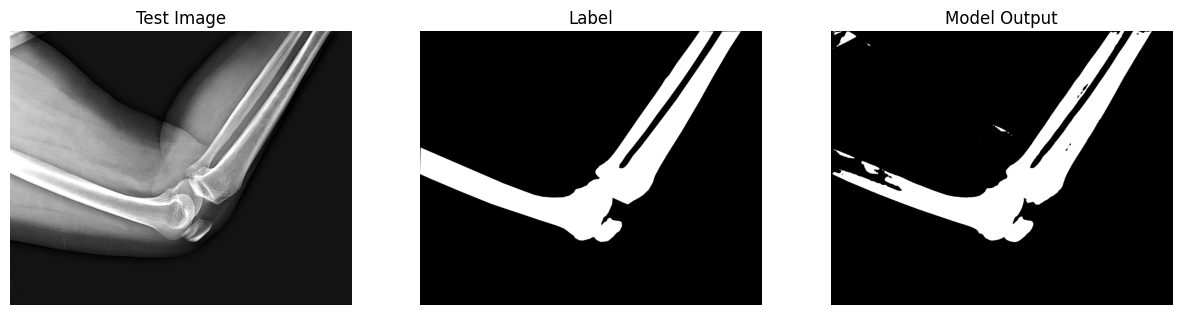

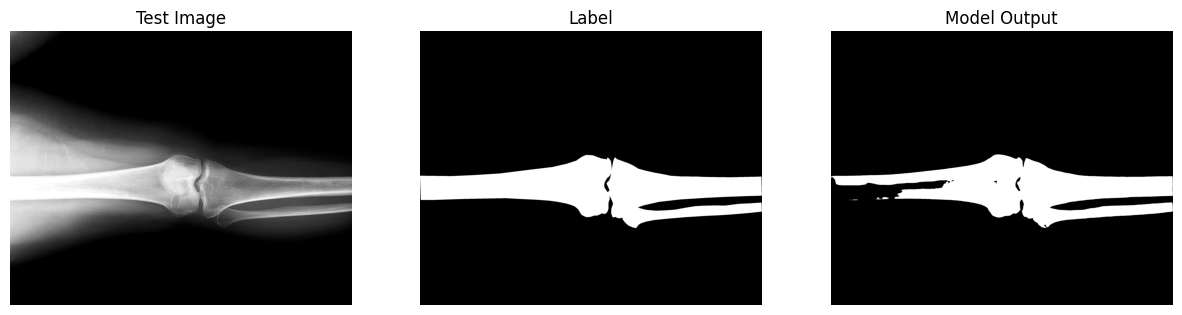

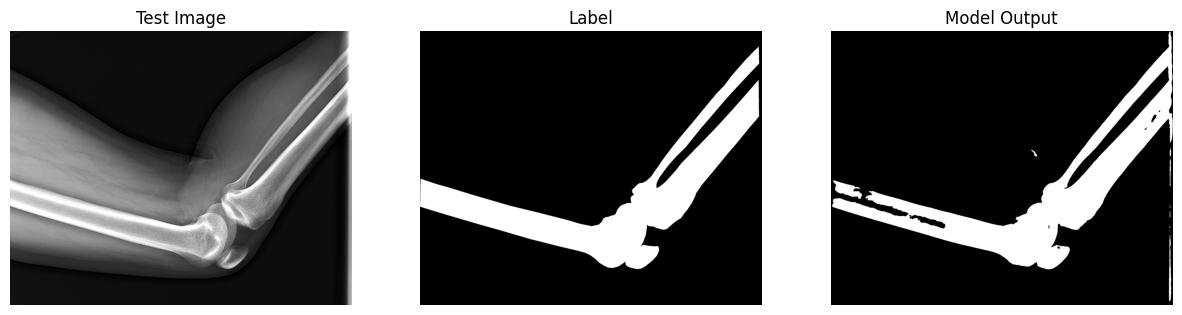

In [12]:
import random

# Test veri setinde rastgele 3 örnek seçmek için
img = 0
num_random_samples = 3

# Test setindeki örnekleri karıştır
random_indices = random.sample(range(len(test_loader.dataset)), num_random_samples)

for idx in random_indices:
    # İlgili veriyi almak için DataLoader'dan direkt indeksleme
    test_data = test_loader.dataset[idx]
    test_images, test_labels = test_data[0].unsqueeze(0).to(device), test_data[1].unsqueeze(0).to(device)

    # Doğrudan tahmin yap (sliding window kaldırıldı)
    test_outputs = model(test_images)  # Model, 2304x2880 boyutunda doğrudan tahmin yapar
    test_outputs = [post_trans(i) for i in decollate_batch(test_outputs)]  # Son işlem

    # Görselleştirme
    goster([test_images[0][0].cpu().detach().numpy(),
            test_labels[0][0].cpu().detach().numpy(),
            test_outputs[0][0].cpu().detach().numpy()])

    img += 1
    if img == num_random_samples:
        break


Hedef Tespit Başarısı;

In [ ]:
#Dice Score ve IoU (Intersection over Union) Hesaplama

In [13]:
import numpy as np

def dice_score(pred, target):
    """Dice Score hesaplama fonksiyonu."""
    pred = pred > 0.5  # Çıktıları ikili hale getir (threshold: 0.5)
    target = target > 0.5  # Etiketleri ikili hale getir

    intersection = np.logical_and(pred, target).sum()
    union = pred.sum() + target.sum()

    if union == 0:
        return 1.0  # Hem tahmin hem de hedef tamamen sıfırsa Dice Score 1 kabul edilir.

    return 2.0 * intersection / union

def iou_score(pred, target):
    """IoU (Intersection over Union) hesaplama fonksiyonu."""
    pred = pred > 0.5  # Çıktıları ikili hale getir (threshold: 0.5)
    target = target > 0.5  # Etiketleri ikili hale getir

    intersection = np.logical_and(pred, target).sum()
    union = np.logical_or(pred, target).sum()

    if union == 0:
        return 1.0  # Hem tahmin hem de hedef tamamen sıfırsa IoU 1 kabul edilir.

    return intersection / union

# Test veri setinde Dice Score ve IoU hesaplama
num_samples = len(test_loader.dataset)
total_dice_score = 0
total_iou_score = 0

for idx in range(num_samples):
    # Test veri setindeki görüntü ve etiketleri al
    test_data = test_loader.dataset[idx]
    test_images, test_labels = test_data[0].unsqueeze(0).to(device), test_data[1].unsqueeze(0).to(device)

    # Model çıktısını hesapla
    test_outputs = model(test_images)
    test_outputs = [post_trans(i) for i in decollate_batch(test_outputs)]  # Son işlem

    # Dice Score ve IoU hesapla
    pred = test_outputs[0][0].cpu().detach().numpy()
    label = test_labels[0][0].cpu().detach().numpy()
    dice = dice_score(pred, label)
    iou = iou_score(pred, label)
    total_dice_score += dice
    total_iou_score += iou

    print(f"Sample {idx + 1}: Dice Score = {dice:.4f}, IoU = {iou:.4f}")

# Ortalama Dice Score ve IoU
average_dice_score = total_dice_score / num_samples
average_iou_score = total_iou_score / num_samples
print(f"\nAverage Dice Score: {average_dice_score:.4f}")
print(f"Average IoU: {average_iou_score:.4f}")


Sample 1: Dice Score = 0.9407, IoU = 0.8880
Sample 2: Dice Score = 0.9686, IoU = 0.9391
Sample 3: Dice Score = 0.9292, IoU = 0.8678
Sample 4: Dice Score = 0.9361, IoU = 0.8799
Sample 5: Dice Score = 0.9295, IoU = 0.8683
Sample 6: Dice Score = 0.9360, IoU = 0.8796
Sample 7: Dice Score = 0.9491, IoU = 0.9030
Sample 8: Dice Score = 0.9237, IoU = 0.8583
Sample 9: Dice Score = 0.8302, IoU = 0.7097
Sample 10: Dice Score = 0.9387, IoU = 0.8846
Sample 11: Dice Score = 0.8754, IoU = 0.7785
Sample 12: Dice Score = 0.9368, IoU = 0.8811
Sample 13: Dice Score = 0.9588, IoU = 0.9209
Sample 14: Dice Score = 0.9419, IoU = 0.8903
Sample 15: Dice Score = 0.9573, IoU = 0.9180
Sample 16: Dice Score = 0.9605, IoU = 0.9239
Sample 17: Dice Score = 0.9457, IoU = 0.8971
Sample 18: Dice Score = 0.9119, IoU = 0.8380
Sample 19: Dice Score = 0.9387, IoU = 0.8844
Sample 20: Dice Score = 0.9492, IoU = 0.9033
Sample 21: Dice Score = 0.8975, IoU = 0.8141
Sample 22: Dice Score = 0.9333, IoU = 0.8749
Sample 23: Dice Sco

Modeli kaydet;

In [14]:
import os
import torch

# Dosya yolunun doğru olduğundan emin olun ve dizin mevcutsa oluşturun
model_dir = "Python"  # Dizin adı
if not os.path.exists(model_dir):  # Eğer dizin yoksa
    os.makedirs(model_dir)  # Dizini oluştur

# Modeli kaydedin
torch.save(model.state_dict(), os.path.join(model_dir, "model.pth"))

In [15]:
torch.save(model.state_dict(), "Python\model.pth")